In [1]:
import gym
from gym.wrappers import Monitor
import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from SERI import StateProcessor, Estimator, ModelParametersCopier, make_epsilon_greedy_policy, deep_q_learning

from reinforcementlearning.lib import plotting
from collections import deque, namedtuple

env = gym.envs.make("Breakout-v0")

VALID_ACTIONS = [0, 1, 2, 3]

# training
tf.reset_default_graph()

# Where we save our checkpoints and graphs
experiment_dir = os.path.abspath("./experiments_seri/{}".format(env.spec.id))

# Create a glboal step variable
global_step = tf.Variable(0, name='global_step', trainable=False)

# Create estimators
q_estimator = Estimator(scope="q_estimator", summaries_dir=experiment_dir)
target_estimator = Estimator(scope="target_q")

# State processor
state_processor = StateProcessor()

results = []

# Run it!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t, stats in deep_q_learning(sess,
                                    env,
                                    q_estimator=q_estimator,
                                    target_estimator=target_estimator,
                                    state_processor=state_processor,
                                    experiment_dir=experiment_dir,
                                    num_episodes=10000,
                                    replay_memory_size=500000,
                                    replay_memory_init_size=50000,
                                    update_target_estimator_every=10000,
                                    epsilon_start=1.0,
                                    epsilon_end=0.1,
                                    epsilon_decay_steps=500000,
                                    discount_factor=0.99,
                                    batch_size=40,
                                    ser_coef=32):
        results.append(stats.episode_rewards[-1])
        print("\nEpisode Reward: {}".format(stats.episode_rewards[-1]))




Instructions for updating:
Use `tf.cast` instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







Populating replay memory...
Mean reward in replay buffer: 1.3582089552238805 STD: 1.2771236338426295
Target mean reward: 3.9134562229091396
Secondary experience collection...
Last reward: 5.0
Mean reward in replay buffer: 1.3819095477386936 STD: 1.29680040

Last reward: 3.0
Mean reward in replay buffer: 1.7868852459016393 STD: 1.17363089417846
Last reward: 0.0
Mean reward in replay buffer: 1.7868852459016393 STD: 1.17363089417846
Last reward: 1.0
Mean reward in replay buffer: 1.7923497267759563 STD: 1.1675777725878194
Last reward: 1.0
Mean reward in replay buffer: 1.8076923076923077 STD: 1.1569373524089648
Last reward: 0.0
Mean reward in replay buffer: 1.8076923076923077 STD: 1.1569373524089648
Last reward: 1.0
Mean reward in replay buffer: 1.8131868131868132 STD: 1.1506624362757683
Last reward: 0.0
Mean reward in replay buffer: 1.8131868131868132 STD: 1.1506624362757683
Last reward: 1.0
Mean reward in replay buffer: 1.8186813186813187 STD: 1.1443265855275813
Last reward: 3.0
Mean reward in replay buffer: 1.8555555555555556 STD: 1.129207079406277
Last reward: 1.0
Mean reward in replay buffer: 1.8611111111111112 STD: 1.1224668010364165
Last reward: 1.0
Mean reward in replay buffer: 1.8666666666666667 STD: 1.1156579840749439
Last reward: 0.

Last reward: 1.0
Mean reward in replay buffer: 2.2951807228915664 STD: 1.0632601226197724
Last reward: 3.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 1.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 0.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 1.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 0.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 1.0
Mean reward in replay buffer: 2.3072289156626504 STD: 1.0598208119020098
Last reward: 3.0
Mean reward in replay buffer: 2.327272727272727 STD: 1.0543963500369182
Last reward: 0.0
Mean reward in replay buffer: 2.327272727272727 STD: 1.0543963500369182
Last reward: 3.0
Mean reward in replay buffer: 2.3393939393939394 STD: 1.0505339507461726
Last reward: 1.0
Mean reward in replay buffer: 2.3393939393939394 STD: 1.0505339507461726
Last reward:

Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 2.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 0.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 0.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 2.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 0.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last reward: 1.0
Mean reward in replay buffer: 2.6903225806451614 STD: 0.9014255804469974
Last rewar

Last reward: 2.0
Mean reward in replay buffer: 2.827814569536424 STD: 0.9220382450778891
Last reward: 0.0
Mean reward in replay buffer: 2.8092105263157894 STD: 0.9471711289086739
Last reward: 2.0
Mean reward in replay buffer: 2.827814569536424 STD: 0.9220382450778891
Last reward: 2.0
Mean reward in replay buffer: 2.827814569536424 STD: 0.9220382450778891
Last reward: 1.0
Mean reward in replay buffer: 2.8157894736842106 STD: 0.9308619706300629
Last reward: 2.0
Mean reward in replay buffer: 2.827814569536424 STD: 0.9220382450778891
Last reward: 2.0
Mean reward in replay buffer: 2.827814569536424 STD: 0.9220382450778891
Last reward: 0.0
Mean reward in replay buffer: 2.8092105263157894 STD: 0.9471711289086739
Last reward: 2.0
Mean reward in replay buffer: 2.8223684210526314 STD: 0.9214297390627668
Last reward: 0.0
Mean reward in replay buffer: 2.8223684210526314 STD: 0.9214297390627668
Last reward: 0.0
Mean reward in replay buffer: 2.8223684210526314 STD: 0.9214297390627668
Last reward: 1.

Last reward: 2.0
Mean reward in replay buffer: 2.9395973154362416 STD: 0.9316375289768816
Last reward: 0.0
Mean reward in replay buffer: 2.9395973154362416 STD: 0.9316375289768816
Last reward: 0.0
Mean reward in replay buffer: 2.9395973154362416 STD: 0.9316375289768816
Last reward: 2.0
Mean reward in replay buffer: 2.9395973154362416 STD: 0.9316375289768816
Last reward: 0.0
Mean reward in replay buffer: 2.9395973154362416 STD: 0.9316375289768816
Last reward: 3.0
Mean reward in replay buffer: 2.9527027027027026 STD: 0.9282743807619815
Last reward: 0.0
Mean reward in replay buffer: 2.9328859060402683 STD: 0.9562343765210277
Last reward: 1.0
Mean reward in replay buffer: 2.9527027027027026 STD: 0.9282743807619815
Last reward: 3.0
Mean reward in replay buffer: 2.9594594594594597 STD: 0.9249260193131269
Last reward: 1.0
Mean reward in replay buffer: 2.9594594594594597 STD: 0.9249260193131269
Last reward: 1.0
Mean reward in replay buffer: 2.9594594594594597 STD: 0.9249260193131269
Last rewar

Last reward: 4.0
Mean reward in replay buffer: 3.1888111888111887 STD: 0.9112060492003338
Last reward: 1.0
Mean reward in replay buffer: 3.1888111888111887 STD: 0.9112060492003338
Last reward: 1.0
Mean reward in replay buffer: 3.1888111888111887 STD: 0.9112060492003338
Last reward: 0.0
Mean reward in replay buffer: 3.1888111888111887 STD: 0.9112060492003338
Last reward: 2.0
Mean reward in replay buffer: 3.1888111888111887 STD: 0.9112060492003338
Last reward: 3.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 2.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 1.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 1.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 1.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 2.0
Mean reward in replay buffer: 3.204225352112676 STD: 0.903411441450794
Last reward: 0.0
Mean 

Last reward: 0.0
Mean reward in replay buffer: 3.3597122302158273 STD: 0.8341201582071966
Last reward: 1.0
Mean reward in replay buffer: 3.3597122302158273 STD: 0.8341201582071966
Last reward: 3.0
Mean reward in replay buffer: 3.366906474820144 STD: 0.8265861773469003
Last reward: 1.0
Mean reward in replay buffer: 3.366906474820144 STD: 0.8265861773469003
Last reward: 0.0
Mean reward in replay buffer: 3.366906474820144 STD: 0.8265861773469003
Last reward: 0.0
Mean reward in replay buffer: 3.366906474820144 STD: 0.8265861773469003
Last reward: 3.0
Mean reward in replay buffer: 3.3840579710144927 STD: 0.8134136750963862
Last reward: 0.0
Mean reward in replay buffer: 3.3597122302158273 STD: 0.859787589580801
Last reward: 3.0
Mean reward in replay buffer: 3.391304347826087 STD: 0.8054085657547835
Last reward: 3.0
Mean reward in replay buffer: 3.398550724637681 STD: 0.7972567479963706
Last reward: 1.0
Mean reward in replay buffer: 3.398550724637681 STD: 0.7972567479963706
Last reward: 1.0
M

Last reward: 1.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 3.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 0.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 1.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 2.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 0.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 3.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 2.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 0.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 1.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last reward: 1.0
Mean reward in replay buffer: 3.6194029850746268 STD: 1.0096882279124617
Last rewar

Last reward: 0.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 1.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 0.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 2.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 1.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 2.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 0.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 2.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 1.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 1.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 3.0
Mean reward in replay buffer: 3.757575757575758 STD: 1.1059948519489544
Last reward: 1.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 3.89922480620155 STD: 1.2044511278502938
Last reward: 1.0
Mean reward in replay buffer: 3.89922480620155 STD: 1.2044511278502938
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 3.0
Mean reward in replay buffer: 3.89922480620155 STD: 1.2044511278502938
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 2.0
Mean reward in replay buffer: 3.89922480620155 STD: 1.2044511278502938
Last reward: 1.0
Mean reward in replay buffer: 3.89922480620155 STD: 1.2044511278502938
Last reward: 0.0
Mean reward in replay buffer: 3.8692307692307693 STD: 1.2475617244891157
Last reward: 1.0
Mea

Step 340 (7679) @ Episode 31/10000, loss: 0.00030806090217083695
Episode Reward: 3.0
Step 235 (7914) @ Episode 32/10000, loss: 0.00019888598762918264
Episode Reward: 1.0
Step 178 (8092) @ Episode 33/10000, loss: 0.00010921037755906582
Episode Reward: 0.0
Step 183 (8275) @ Episode 34/10000, loss: 6.603218207601458e-053
Episode Reward: 0.0
Step 161 (8436) @ Episode 35/10000, loss: 0.02456243336200714485
Episode Reward: 0.0
Step 178 (8614) @ Episode 36/10000, loss: 9.837902325671166e-054
Episode Reward: 0.0
Step 437 (9051) @ Episode 37/10000, loss: 6.763824785593897e-055
Episode Reward: 4.0
Step 274 (9325) @ Episode 38/10000, loss: 0.00026376769528724253
Episode Reward: 2.0
Step 182 (9507) @ Episode 39/10000, loss: 0.00013814459089189768
Episode Reward: 0.0
Step 178 (9685) @ Episode 40/10000, loss: 0.02443743869662285052
Episode Reward: 0.0
Step 287 (9972) @ Episode 41/10000, loss: 0.02492544800043106534
Episode Reward: 2.0
Step 27 (9999) @ Episode 42/10000, loss: 0.02480277419090271415
C

Step 272 (29765) @ Episode 123/10000, loss: 0.00013014259457122535
Episode Reward: 2.0
Step 209 (29974) @ Episode 124/10000, loss: 0.00060584838502109057
Episode Reward: 1.0
Step 25 (29999) @ Episode 125/10000, loss: 0.0004152805486228317
Copied model parameters to target network.
Step 189 (30163) @ Episode 125/10000, loss: 0.00124829239211976535
Episode Reward: 0.0
Step 180 (30343) @ Episode 126/10000, loss: 0.00062452512793242933
Episode Reward: 0.0
Step 186 (30529) @ Episode 127/10000, loss: 0.00226313481107354164
Episode Reward: 0.0
Step 178 (30707) @ Episode 128/10000, loss: 0.00010379004379501566
Episode Reward: 0.0
Step 209 (30916) @ Episode 129/10000, loss: 0.00108393782284110787
Episode Reward: 1.0
Step 208 (31124) @ Episode 130/10000, loss: 0.00024601153563708067
Episode Reward: 1.0
Step 252 (31376) @ Episode 131/10000, loss: 0.00023289848468266428
Episode Reward: 1.0
Step 185 (31561) @ Episode 132/10000, loss: 0.00022063982032705098
Episode Reward: 0.0
Step 406 (31967) @ Epi

Step 305 (51406) @ Episode 213/10000, loss: 0.00014047960576135665
Episode Reward: 2.0
Step 238 (51644) @ Episode 214/10000, loss: 0.00014748239482287318
Episode Reward: 1.0
Step 224 (51868) @ Episode 215/10000, loss: 0.00103605329059064397
Episode Reward: 1.0
Step 323 (52191) @ Episode 216/10000, loss: 7.26766447769478e-0598
Episode Reward: 2.0
Step 348 (52539) @ Episode 217/10000, loss: 0.00011637662828434259
Episode Reward: 3.0
Step 174 (52713) @ Episode 218/10000, loss: 0.00010184268467128277
Episode Reward: 0.0
Step 373 (53086) @ Episode 219/10000, loss: 0.00425273412838578274
Episode Reward: 3.0
Step 256 (53342) @ Episode 220/10000, loss: 9.542237967252731e-055
Episode Reward: 2.0
Step 163 (53505) @ Episode 221/10000, loss: 0.00020841830701101577
Episode Reward: 0.0
Step 238 (53743) @ Episode 222/10000, loss: 0.00090781750623136767
Episode Reward: 1.0
Step 181 (53924) @ Episode 223/10000, loss: 0.00015535535931121558
Episode Reward: 0.0
Step 180 (54104) @ Episode 224/10000, loss:

Step 168 (74032) @ Episode 304/10000, loss: 0.00081986130680888895
Episode Reward: 0.0
Step 171 (74203) @ Episode 305/10000, loss: 0.00022945013188291346
Episode Reward: 0.0
Step 230 (74433) @ Episode 306/10000, loss: 0.00051745079690590553
Episode Reward: 1.0
Step 382 (74815) @ Episode 307/10000, loss: 0.00108312419615685944
Episode Reward: 4.0
Step 239 (75054) @ Episode 308/10000, loss: 0.00043996368185617035
Episode Reward: 1.0
Step 175 (75229) @ Episode 309/10000, loss: 0.00037669340963475406
Episode Reward: 0.0
Step 184 (75413) @ Episode 310/10000, loss: 0.00072112085763365034
Episode Reward: 0.0
Step 212 (75625) @ Episode 311/10000, loss: 0.00256662745960056898
Episode Reward: 1.0
Step 248 (75873) @ Episode 312/10000, loss: 0.00063244503689929846
Episode Reward: 1.0
Step 288 (76161) @ Episode 313/10000, loss: 0.00011359558266121894
Episode Reward: 2.0
Step 228 (76389) @ Episode 314/10000, loss: 0.00067317794309929013
Episode Reward: 1.0
Step 247 (76636) @ Episode 315/10000, loss:

Step 196 (97078) @ Episode 395/10000, loss: 7.337999704759568e-057
Episode Reward: 0.0
Step 235 (97313) @ Episode 396/10000, loss: 0.00122930645011365415
Episode Reward: 1.0
Step 275 (97588) @ Episode 397/10000, loss: 0.00039706128882244232
Episode Reward: 2.0
Step 413 (98001) @ Episode 398/10000, loss: 0.00073903630254790195
Episode Reward: 4.0
Step 176 (98177) @ Episode 399/10000, loss: 4.924974200548604e-054
Episode Reward: 0.0
Step 252 (98429) @ Episode 400/10000, loss: 0.00140343536622822284
Episode Reward: 1.0
Step 236 (98665) @ Episode 401/10000, loss: 0.00197549955919384964
Episode Reward: 1.0
Step 187 (98852) @ Episode 402/10000, loss: 0.00098910299129784145
Episode Reward: 0.0
Step 188 (99040) @ Episode 403/10000, loss: 0.00063138420227915055
Episode Reward: 0.0
Step 258 (99298) @ Episode 404/10000, loss: 7.130058656912297e-056
Episode Reward: 1.0
Step 172 (99470) @ Episode 405/10000, loss: 0.00048397382488474253
Episode Reward: 0.0
Step 298 (99768) @ Episode 406/10000, loss:

Step 232 (119148) @ Episode 485/10000, loss: 0.00037836114643141636
Episode Reward: 1.0
Step 222 (119370) @ Episode 486/10000, loss: 0.00081664684694260366
Episode Reward: 1.0
Step 174 (119544) @ Episode 487/10000, loss: 0.00044027762487530713
Episode Reward: 0.0
Step 207 (119751) @ Episode 488/10000, loss: 0.00020118869724683464
Episode Reward: 1.0
Step 248 (119999) @ Episode 489/10000, loss: 9.326009603682905e-056
Copied model parameters to target network.
Step 275 (120026) @ Episode 489/10000, loss: 0.00047079319483600557
Episode Reward: 2.0
Step 204 (120230) @ Episode 490/10000, loss: 0.00126390089280903347
Episode Reward: 1.0
Step 254 (120484) @ Episode 491/10000, loss: 0.01131012942641973534
Episode Reward: 2.0
Step 316 (120800) @ Episode 492/10000, loss: 0.00090377096785232426
Episode Reward: 2.0
Step 270 (121070) @ Episode 493/10000, loss: 0.00131489988416433333
Episode Reward: 2.0
Step 398 (121468) @ Episode 494/10000, loss: 0.00168211443815380335
Episode Reward: 4.0
Step 180 

Step 170 (141048) @ Episode 574/10000, loss: 0.00063303543720394374
Episode Reward: 0.0
Step 353 (141401) @ Episode 575/10000, loss: 0.00048232660628855237
Episode Reward: 4.0
Step 178 (141579) @ Episode 576/10000, loss: 0.00022671534679830074
Episode Reward: 0.0
Step 360 (141939) @ Episode 577/10000, loss: 0.00030851966585032641
Episode Reward: 3.0
Step 344 (142283) @ Episode 578/10000, loss: 0.00121668574865907435
Episode Reward: 3.0
Step 237 (142520) @ Episode 579/10000, loss: 0.00051368970889598136
Episode Reward: 1.0
Step 235 (142755) @ Episode 580/10000, loss: 0.00068724004086107025
Episode Reward: 1.0
Step 297 (143052) @ Episode 581/10000, loss: 0.00114062509965151553
Episode Reward: 2.0
Step 224 (143276) @ Episode 582/10000, loss: 0.00104595790617167954
Episode Reward: 1.0
Step 180 (143456) @ Episode 583/10000, loss: 0.00038363115163519985
Episode Reward: 0.0
Step 254 (143710) @ Episode 584/10000, loss: 0.00018464091408532113
Episode Reward: 2.0
Step 174 (143884) @ Episode 585/

Step 170 (162595) @ Episode 664/10000, loss: 0.00023601253633387387
Episode Reward: 0.0
Step 255 (162850) @ Episode 665/10000, loss: 0.00034899020101875067
Episode Reward: 1.0
Step 332 (163182) @ Episode 666/10000, loss: 0.00028961669886484744
Episode Reward: 3.0
Step 182 (163364) @ Episode 667/10000, loss: 0.00033192444243468344
Episode Reward: 0.0
Step 396 (163760) @ Episode 668/10000, loss: 0.00059754896210506565
Episode Reward: 4.0
Step 267 (164027) @ Episode 669/10000, loss: 0.00145754369441419842
Episode Reward: 2.0
Step 178 (164205) @ Episode 670/10000, loss: 0.00023800740018486977
Episode Reward: 0.0
Step 183 (164388) @ Episode 671/10000, loss: 0.00057026243302971127
Episode Reward: 0.0
Step 230 (164618) @ Episode 672/10000, loss: 0.00016343992319889367
Episode Reward: 1.0
Step 229 (164847) @ Episode 673/10000, loss: 0.00026413559680804613
Episode Reward: 1.0
Step 246 (165093) @ Episode 674/10000, loss: 0.00057544664014130837
Episode Reward: 1.0
Step 266 (165359) @ Episode 675/

Step 298 (184223) @ Episode 754/10000, loss: 0.00037268392043188214
Episode Reward: 2.0
Step 234 (184457) @ Episode 755/10000, loss: 0.00097172270761802793
Episode Reward: 1.0
Step 284 (184741) @ Episode 756/10000, loss: 0.00032926994026638578
Episode Reward: 2.0
Step 284 (185025) @ Episode 757/10000, loss: 0.00027658924227580439
Episode Reward: 2.0
Step 398 (185423) @ Episode 758/10000, loss: 0.00045703258365392685
Episode Reward: 4.0
Step 167 (185590) @ Episode 759/10000, loss: 0.00172848557122051723
Episode Reward: 0.0
Step 165 (185755) @ Episode 760/10000, loss: 0.00064222060609608894
Episode Reward: 0.0
Step 311 (186066) @ Episode 761/10000, loss: 0.00019617014913819733
Episode Reward: 2.0
Step 189 (186255) @ Episode 762/10000, loss: 0.00043032644316554075
Episode Reward: 0.0
Step 176 (186431) @ Episode 763/10000, loss: 0.00015093554975464947
Episode Reward: 0.0
Step 329 (186760) @ Episode 764/10000, loss: 0.00081899372162297373
Episode Reward: 3.0
Step 399 (187159) @ Episode 765/

Step 169 (206645) @ Episode 844/10000, loss: 0.00024216082238126546
Episode Reward: 0.0
Step 231 (206876) @ Episode 845/10000, loss: 0.00014124714653007686
Episode Reward: 1.0
Step 328 (207204) @ Episode 846/10000, loss: 0.00046710437163710594
Episode Reward: 3.0
Step 482 (207686) @ Episode 847/10000, loss: 0.00030499394051730633
Episode Reward: 5.0
Step 248 (207934) @ Episode 848/10000, loss: 0.00032998659298755233
Episode Reward: 1.0
Step 229 (208163) @ Episode 849/10000, loss: 0.00028212886536493977
Episode Reward: 1.0
Step 272 (208435) @ Episode 850/10000, loss: 0.00061343575362116142
Episode Reward: 2.0
Step 356 (208791) @ Episode 851/10000, loss: 0.00055393169168382888
Episode Reward: 3.0
Step 443 (209234) @ Episode 852/10000, loss: 0.00019766800687648356
Episode Reward: 5.0
Step 247 (209481) @ Episode 853/10000, loss: 0.00233527179807424555
Episode Reward: 1.0
Step 187 (209668) @ Episode 854/10000, loss: 0.00019216521468479186
Episode Reward: 0.0
Step 264 (209932) @ Episode 855/

Step 350 (229374) @ Episode 934/10000, loss: 0.00011161863949382678
Episode Reward: 3.0
Step 237 (229611) @ Episode 935/10000, loss: 0.00128847314044833186
Episode Reward: 1.0
Step 340 (229951) @ Episode 936/10000, loss: 0.00073386938311159615
Episode Reward: 4.0
Step 48 (229999) @ Episode 937/10000, loss: 0.00032567110611125827
Copied model parameters to target network.
Step 269 (230220) @ Episode 937/10000, loss: 0.00068666914012283093
Episode Reward: 1.0
Step 267 (230487) @ Episode 938/10000, loss: 0.00423044338822364886
Episode Reward: 2.0
Step 234 (230721) @ Episode 939/10000, loss: 0.00019054964650422335
Episode Reward: 1.0
Step 208 (230929) @ Episode 940/10000, loss: 0.00024308494175784297
Episode Reward: 0.0
Step 173 (231102) @ Episode 941/10000, loss: 8.78048813319765e-0513
Episode Reward: 0.0
Step 168 (231270) @ Episode 942/10000, loss: 0.00060639483854174614
Episode Reward: 0.0
Step 238 (231508) @ Episode 943/10000, loss: 0.00048206435167230666
Episode Reward: 1.0
Step 241 (

Step 268 (251762) @ Episode 1023/10000, loss: 0.00275996490381658086
Episode Reward: 2.0
Step 179 (251941) @ Episode 1024/10000, loss: 0.00031239696545526385
Episode Reward: 0.0
Step 281 (252222) @ Episode 1025/10000, loss: 0.00023202516604214907
Episode Reward: 2.0
Step 312 (252534) @ Episode 1026/10000, loss: 0.00036690002889372415
Episode Reward: 3.0
Step 283 (252817) @ Episode 1027/10000, loss: 0.00069324637297540994
Episode Reward: 2.0
Step 431 (253248) @ Episode 1028/10000, loss: 0.00087865849491208791
Episode Reward: 5.0
Step 366 (253614) @ Episode 1029/10000, loss: 0.00224391324445605286
Episode Reward: 4.0
Step 182 (253796) @ Episode 1030/10000, loss: 0.00197225459851324562
Episode Reward: 0.0
Step 172 (253968) @ Episode 1031/10000, loss: 0.00223352340981364253
Episode Reward: 0.0
Step 172 (254140) @ Episode 1032/10000, loss: 0.00049840268911793836
Episode Reward: 0.0
Step 177 (254317) @ Episode 1033/10000, loss: 0.00082030985504388816
Episode Reward: 0.0
Step 176 (254493) @ E

Step 275 (275030) @ Episode 1112/10000, loss: 0.00043210334843024611
Episode Reward: 2.0
Step 346 (275376) @ Episode 1113/10000, loss: 0.00052773486822843557
Episode Reward: 3.0
Step 280 (275656) @ Episode 1114/10000, loss: 0.00023820414207875729
Episode Reward: 2.0
Step 166 (275822) @ Episode 1115/10000, loss: 0.00106671894900500778
Episode Reward: 0.0
Step 258 (276080) @ Episode 1116/10000, loss: 0.00274475803598761563
Episode Reward: 2.0
Step 240 (276320) @ Episode 1117/10000, loss: 0.00142093934118747718
Episode Reward: 1.0
Step 238 (276558) @ Episode 1118/10000, loss: 0.00034728558966889987
Episode Reward: 1.0
Step 302 (276860) @ Episode 1119/10000, loss: 0.00036859294050373137
Episode Reward: 2.0
Step 171 (277031) @ Episode 1120/10000, loss: 0.00083927251398563396
Episode Reward: 0.0
Step 455 (277486) @ Episode 1121/10000, loss: 0.00055339047685265545
Episode Reward: 4.0
Step 220 (277706) @ Episode 1122/10000, loss: 0.00038788618985563517
Episode Reward: 1.0
Step 207 (277913) @ E

Step 168 (297056) @ Episode 1201/10000, loss: 0.00050581950927153233
Episode Reward: 0.0
Step 292 (297348) @ Episode 1202/10000, loss: 0.00055089499801397324
Episode Reward: 2.0
Step 476 (297824) @ Episode 1203/10000, loss: 0.00336534460075199615
Episode Reward: 6.0
Step 219 (298043) @ Episode 1204/10000, loss: 0.00057703565107658515
Episode Reward: 1.0
Step 235 (298278) @ Episode 1205/10000, loss: 0.00153973163105547433
Episode Reward: 1.0
Step 210 (298488) @ Episode 1206/10000, loss: 0.00150111899711191656
Episode Reward: 1.0
Step 234 (298722) @ Episode 1207/10000, loss: 0.00131562445312738427
Episode Reward: 1.0
Step 242 (298964) @ Episode 1208/10000, loss: 0.00196451577357947834
Episode Reward: 1.0
Step 184 (299148) @ Episode 1209/10000, loss: 0.00020475871860980988
Episode Reward: 0.0
Step 205 (299353) @ Episode 1210/10000, loss: 0.00072840991197153936
Episode Reward: 0.0
Step 296 (299649) @ Episode 1211/10000, loss: 0.00067489605862647336
Episode Reward: 2.0
Step 262 (299911) @ E

Step 261 (324646) @ Episode 1289/10000, loss: 0.00039006996667012575
Episode Reward: 2.0
Step 210 (324856) @ Episode 1290/10000, loss: 0.00039337552152574065
Episode Reward: 1.0
Step 227 (325083) @ Episode 1291/10000, loss: 0.00133958575315773494
Episode Reward: 1.0
Step 492 (325575) @ Episode 1292/10000, loss: 0.00169402849860489376
Episode Reward: 6.0
Step 407 (325982) @ Episode 1293/10000, loss: 0.00173605850432068106
Episode Reward: 4.0
Step 311 (326293) @ Episode 1294/10000, loss: 0.00029857453773729503
Episode Reward: 2.0
Step 413 (326706) @ Episode 1295/10000, loss: 0.00030171175603754823
Episode Reward: 4.0
Step 329 (327035) @ Episode 1296/10000, loss: 0.00148189277388155461
Episode Reward: 2.0
Step 354 (327389) @ Episode 1297/10000, loss: 0.00356012629345059438
Episode Reward: 4.0
Step 488 (327877) @ Episode 1298/10000, loss: 0.00027644555666483945
Episode Reward: 5.0
Step 265 (328142) @ Episode 1299/10000, loss: 0.00179421622306108476
Episode Reward: 2.0
Step 480 (328622) @ E

Step 411 (361077) @ Episode 1376/10000, loss: 0.00057770393323153266
Episode Reward: 5.0
Step 384 (361461) @ Episode 1377/10000, loss: 0.00244654016569256847
Episode Reward: 3.0
Step 289 (361750) @ Episode 1378/10000, loss: 0.00082078075502067857
Episode Reward: 2.0
Step 333 (362083) @ Episode 1379/10000, loss: 0.00252461736090481343
Episode Reward: 3.0
Step 258 (362341) @ Episode 1380/10000, loss: 0.00408211816102266335
Episode Reward: 2.0
Step 214 (362555) @ Episode 1381/10000, loss: 0.00061668548732995995
Episode Reward: 1.0
Step 355 (362910) @ Episode 1382/10000, loss: 0.00199116719886660586
Episode Reward: 3.0
Step 359 (363269) @ Episode 1383/10000, loss: 0.00350773264653980736
Episode Reward: 3.0
Step 304 (363573) @ Episode 1384/10000, loss: 0.00147308770101517443
Episode Reward: 3.0
Step 322 (363895) @ Episode 1385/10000, loss: 0.00222925515845417987
Episode Reward: 3.0
Step 411 (364306) @ Episode 1386/10000, loss: 0.00244421465322375374
Episode Reward: 4.0
Step 588 (364894) @ E

Step 406 (399999) @ Episode 1464/10000, loss: 0.00107395625673234464
Copied model parameters to target network.
Step 536 (400129) @ Episode 1464/10000, loss: 0.0032575621735304594
Episode Reward: 7.0
Step 415 (400544) @ Episode 1465/10000, loss: 0.00326166371814906693
Episode Reward: 4.0
Step 514 (401058) @ Episode 1466/10000, loss: 0.00295550352893769746
Episode Reward: 8.0
Step 522 (401580) @ Episode 1467/10000, loss: 0.00182626151945441966
Episode Reward: 7.0
Step 735 (402315) @ Episode 1468/10000, loss: 0.00089843646856024864
Episode Reward: 9.0
Step 400 (402715) @ Episode 1469/10000, loss: 0.00365795940160751345
Episode Reward: 3.0
Step 573 (403288) @ Episode 1470/10000, loss: 0.00168546196073293695
Episode Reward: 7.0
Step 409 (403697) @ Episode 1471/10000, loss: 0.00142172735650092363
Episode Reward: 5.0
Step 475 (404172) @ Episode 1472/10000, loss: 0.00249529560096561987
Episode Reward: 6.0
Step 712 (404884) @ Episode 1473/10000, loss: 0.00606653559952974374
Episode Reward: 12.

Step 990 (458614) @ Episode 1548/10000, loss: 0.00275090662762522735
Episode Reward: 14.0
Step 663 (459277) @ Episode 1549/10000, loss: 0.0014167523477226496
Episode Reward: 9.0
Step 722 (459999) @ Episode 1550/10000, loss: 0.0013196641812101007
Copied model parameters to target network.
Step 922 (460199) @ Episode 1550/10000, loss: 0.0011920932447537784
Episode Reward: 19.0
Step 846 (461045) @ Episode 1551/10000, loss: 0.0026994105428457265
Episode Reward: 27.0
Step 1087 (462132) @ Episode 1552/10000, loss: 0.0028742854483425617
Episode Reward: 26.0
Step 901 (463033) @ Episode 1553/10000, loss: 0.00128104002214968255
Episode Reward: 13.0
Step 1112 (464145) @ Episode 1554/10000, loss: 0.0019113119924440983
Episode Reward: 22.0
Step 937 (465082) @ Episode 1555/10000, loss: 0.0011090738698840141
Episode Reward: 18.0
Step 814 (465896) @ Episode 1556/10000, loss: 0.0026070408057421446
Episode Reward: 12.0
Step 944 (466840) @ Episode 1557/10000, loss: 0.0014281522016972303
Episode Reward: 1

Step 875 (538722) @ Episode 1629/10000, loss: 0.0051190154626965526
Episode Reward: 22.0
Step 1044 (539766) @ Episode 1630/10000, loss: 0.0061134272255003455
Episode Reward: 22.0
Step 233 (539999) @ Episode 1631/10000, loss: 0.0043812086805701267
Copied model parameters to target network.
Step 1074 (540840) @ Episode 1631/10000, loss: 0.0029781481716781855
Episode Reward: 22.0
Step 970 (541810) @ Episode 1632/10000, loss: 0.0032530464231967926
Episode Reward: 20.0
Step 1033 (542843) @ Episode 1633/10000, loss: 0.0012888102792203426
Episode Reward: 16.0
Step 862 (543705) @ Episode 1634/10000, loss: 0.0059585357084870346
Episode Reward: 21.0
Step 1052 (544757) @ Episode 1635/10000, loss: 0.0017602350562810898
Episode Reward: 32.0
Step 653 (545410) @ Episode 1636/10000, loss: 0.0022568884305655956
Episode Reward: 11.0
Step 1153 (546563) @ Episode 1637/10000, loss: 0.0161670707166194923
Episode Reward: 31.0
Step 780 (547343) @ Episode 1638/10000, loss: 0.0038980860263109207
Episode Reward:

Step 1338 (623025) @ Episode 1709/10000, loss: 0.0039037824608385563
Episode Reward: 31.0
Step 1058 (624083) @ Episode 1710/10000, loss: 0.0032761848997324705
Episode Reward: 26.0
Step 736 (624819) @ Episode 1711/10000, loss: 0.0093408655375242238
Episode Reward: 13.0
Step 1572 (626391) @ Episode 1712/10000, loss: 0.0011631271336227655
Episode Reward: 48.0
Step 1731 (628122) @ Episode 1713/10000, loss: 0.0053306547924876212
Episode Reward: 48.0
Step 1008 (629130) @ Episode 1714/10000, loss: 0.0020680918823927644
Episode Reward: 22.0
Step 869 (629999) @ Episode 1715/10000, loss: 0.0035674385726451874
Copied model parameters to target network.
Step 1269 (630399) @ Episode 1715/10000, loss: 0.0117912162095308395
Episode Reward: 29.0
Step 1004 (631403) @ Episode 1716/10000, loss: 0.0015997511800378564
Episode Reward: 25.0
Step 1232 (632635) @ Episode 1717/10000, loss: 0.0026881222147494555
Episode Reward: 31.0
Step 734 (633369) @ Episode 1718/10000, loss: 0.0014454751508310437
Episode Rewa

Step 1391 (706575) @ Episode 1790/10000, loss: 0.0027190535329282284
Episode Reward: 30.0
Step 715 (707290) @ Episode 1791/10000, loss: 0.0028423529583960777
Episode Reward: 15.0
Step 1032 (708322) @ Episode 1792/10000, loss: 0.0061646727845072754
Episode Reward: 21.0
Step 635 (708957) @ Episode 1793/10000, loss: 0.0235106740146875386
Episode Reward: 9.0
Step 700 (709657) @ Episode 1794/10000, loss: 0.0115449484437704096
Episode Reward: 10.0
Step 342 (709999) @ Episode 1795/10000, loss: 0.0043508857488632283
Copied model parameters to target network.
Step 750 (710407) @ Episode 1795/10000, loss: 0.0031883078627288346
Episode Reward: 11.0
Step 749 (711156) @ Episode 1796/10000, loss: 0.0230229478329420115
Episode Reward: 12.0
Step 661 (711817) @ Episode 1797/10000, loss: 0.0166098140180110934
Episode Reward: 10.0
Step 1006 (712823) @ Episode 1798/10000, loss: 0.0034145091194659474
Episode Reward: 16.0
Step 943 (713766) @ Episode 1799/10000, loss: 0.0037812206428498035
Episode Reward: 15

Step 1555 (785734) @ Episode 1871/10000, loss: 0.0097231958061456685
Episode Reward: 37.0
Step 581 (786315) @ Episode 1872/10000, loss: 0.0074401483871042736
Episode Reward: 8.0
Step 896 (787211) @ Episode 1873/10000, loss: 0.0033885159064084297
Episode Reward: 18.0
Step 1737 (788948) @ Episode 1874/10000, loss: 0.0090072546154260644
Episode Reward: 40.0
Step 1051 (789999) @ Episode 1875/10000, loss: 0.0048118671402335175
Copied model parameters to target network.
Step 1115 (790063) @ Episode 1875/10000, loss: 0.0110495369881391532
Episode Reward: 28.0
Step 1064 (791127) @ Episode 1876/10000, loss: 0.0137327732518315326
Episode Reward: 27.0
Step 679 (791806) @ Episode 1877/10000, loss: 0.0083111636340618135
Episode Reward: 11.0
Step 918 (792724) @ Episode 1878/10000, loss: 0.0182861238718032845
Episode Reward: 20.0
Step 1023 (793747) @ Episode 1879/10000, loss: 0.0183930993080139165
Episode Reward: 24.0
Step 844 (794591) @ Episode 1880/10000, loss: 0.0118347331881523135
Episode Reward:

Step 1104 (869197) @ Episode 1952/10000, loss: 0.0156878922134637835
Episode Reward: 24.0
Step 802 (869999) @ Episode 1953/10000, loss: 0.0066335103474557425
Copied model parameters to target network.
Step 1110 (870307) @ Episode 1953/10000, loss: 0.0129120619967579844
Episode Reward: 20.0
Step 799 (871106) @ Episode 1954/10000, loss: 0.0124769955873489386
Episode Reward: 20.0
Step 1430 (872536) @ Episode 1955/10000, loss: 0.0392404235899448445
Episode Reward: 45.0
Step 1355 (873891) @ Episode 1956/10000, loss: 0.0063215019181370735
Episode Reward: 31.0
Step 1367 (875258) @ Episode 1957/10000, loss: 0.0191338881850242675
Episode Reward: 29.0
Step 1284 (876542) @ Episode 1958/10000, loss: 0.0095322476699948315
Episode Reward: 27.0
Step 863 (877405) @ Episode 1959/10000, loss: 0.0090195816010236745
Episode Reward: 15.0
Step 927 (878332) @ Episode 1960/10000, loss: 0.0044681760482490065
Episode Reward: 21.0
Step 953 (879285) @ Episode 1961/10000, loss: 0.0269709341228008275
Episode Reward

KeyboardInterrupt: 

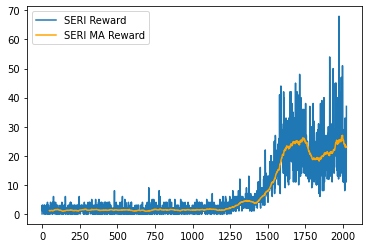

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Reward':  stats.episode_rewards}
df = pd.DataFrame (data)

rolling_mean = df.Reward.rolling(window=50).mean()

plt.plot(df.index, df.Reward, label='SERI Reward')
plt.plot(df.index, rolling_mean, label='SERI MA Reward', color='orange')
plt.legend(loc='upper left')
plt.show()
df.to_csv('output_SERI.csv', index=False)  